In [44]:
import numpy as np
import pickle
import torch
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
from matplotlib import rc

In [45]:
path = 'Documents/meta_results/weights_iterations/'

In [46]:
with open(path + file_idx, 'rb') as fi:
    ood_idx, id_idx = pickle.load(fi)
#     weights = torch.load(fi, map_location=torch.device('cpu'))

In [47]:
len(ood_idx)

182

In [48]:
len(id_idx)

18

In [68]:
w_in_list  = []
w_ood_list = []

for i in range(0, 30001, 100):
#     print(i)
    file_wt = str(i) + '_iteration_5W3S_svhn_oodRatio_0.3_cluster2weight.pkl'
#     file_wt = str(i) + '_iteration_5W5S_svhn_oodRatio_0.3_cluster2weight.pkl'

    with open(path+file_wt, 'rb') as fi:
        weights = torch.load(fi, map_location='cpu')
        weights_id = weights[id_idx].numpy()
        weights_ood= weights[ood_idx].numpy()

        w_in_list.append(weights_id)
        w_ood_list.append(weights_ood)
w_in_all = np.mean(w_in_list, axis=1)
w_ood_all = np.mean(w_ood_list, axis=1)
w_in_all_std = np.std(w_in_list, axis=1)
w_ood_all_std = np.std(w_ood_list, axis=1)
    
#         wt_mean_id = weights_id.mean()
#         wt_mean_ood= weights_ood.mean()

#         wt_std_id  = weights_id.std()
#         wt_std_ood = weights_id.std()



In [59]:
w_in_all

array([0.00505769, 0.00981375, 0.01858943, 0.02271122, 0.0289445 ,
       0.03458866, 0.04248215, 0.05648918, 0.08446929, 0.09048296,
       0.09774852, 0.10546365, 0.1117163 , 0.11842879, 0.12651964,
       0.13129768, 0.13881323, 0.14488426, 0.15291242, 0.16176607,
       0.17745219, 0.2009171 , 0.21523267, 0.22782639, 0.35982406,
       0.3863238 , 0.41888127, 0.4554694 , 0.48637354, 0.4997115 ,
       0.5144549 , 0.5847077 , 0.6667302 , 0.7571119 , 0.839868  ,
       0.91799015, 1.0004046 , 1.0883079 , 1.1810048 , 1.2633704 ,
       1.3546771 , 1.4196169 , 1.4959368 , 1.5781676 , 1.6505449 ,
       1.7116599 , 1.79266   , 1.8840175 , 1.9554666 , 2.012662  ,
       2.0770304 , 2.118004  , 2.1569626 , 2.2058194 , 2.2398615 ,
       2.2708683 , 2.2978182 , 2.3241038 , 2.3473544 , 2.3684702 ,
       2.386569  , 2.4058034 , 2.4255657 , 2.4418793 , 2.4643729 ,
       2.4897306 , 2.5076196 , 2.5216613 , 2.5399444 , 2.5680573 ,
       2.5806713 , 2.5995493 , 2.637861  , 2.6502085 , 2.65984

In [60]:
plt.style.use('seaborn-deep')  # seaborn-whitegrid, ggplot
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = (5, 9)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

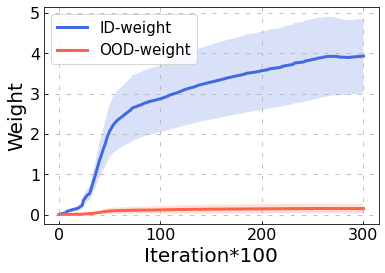

In [69]:
# title = '5-Way 3-Shot 30% SVHN OOD'
xx = range(len(w_ood_all))
linewidth_ = 3

plt.plot(xx, w_in_all, linewidth=linewidth_, color='royalblue', linestyle='-', marker=',', label='ID-weight', ms=7)
plt.plot(xx, w_ood_all, linewidth=linewidth_, color='tomato', linestyle='-', marker=',', label='OOD-weight', ms=7)

plt.fill_between(xx, w_in_all - w_in_all_std, w_in_all + w_in_all_std, alpha=0.2, facecolor='royalblue')
plt.fill_between(xx, w_ood_all - w_ood_all_std, w_ood_all + w_ood_all_std, alpha=0.2, facecolor='tomato')

# plt.title(title, fontsize=20)
plt.legend(loc='best', fontsize=15, ncol=1)
plt.xlabel('Iteration*100', fontsize=20)
plt.ylabel('Weight', fontsize=20)
plt.tick_params(labelsize=16)

# plt.title(dataset)
plt.savefig("svhn_5w3s_03.pdf", dpi=500, bbox_inches='tight')
plt.show()